# Heart_Disease_Prediction_Model

In [1]:
#import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report

# Domain Knowledge about the DataSet 
#   age: The person's age in years
#   sex: The person's sex (1 = male, 0 = female)
#   cp: The chest pain experienced 
#     Value 1: typical angina 
#     Value 2: atypical angina
#     Value 3: non-anginal pain
#     Value 4: asymptomatic
#   trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
#   chol: The person's cholesterol measurement in mg/dl
#   fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
#   restecg: Resting electrocardiographic measurement (
#      0 = normal, 
#      1 = having ST-T wave abnormality, 
#      2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
#   thalach: The person's maximum heart rate achieved
#   exang: Exercise induced angina (1 = yes; 0 = no)
#   oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
#    slope: the slope of the peak exercise ST segment
#     (Value 1: upsloping, Value  2: flat, Value 3: downsloping)
#     ca: The number of major vessels (0-3)
#     thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
#    target: Heart disease (0 = no, 1 = yes)

In [2]:
#read csv file
df= pd.read_csv("heart.csv")

# EDA on the Dataset

In [4]:
# top 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
#last 5 rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
#number of rows and columns in dataset
df.shape

(1025, 14)

In [7]:
#check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# check some information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
#statistical Analysis 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# columns name
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
# correlation of every columns with target column
df.corr()["target"]

age        -0.229324
sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
target      1.000000
Name: target, dtype: float64

In [12]:
# sns.set_style('darkgrid')
# sns.set_palette('Set1')

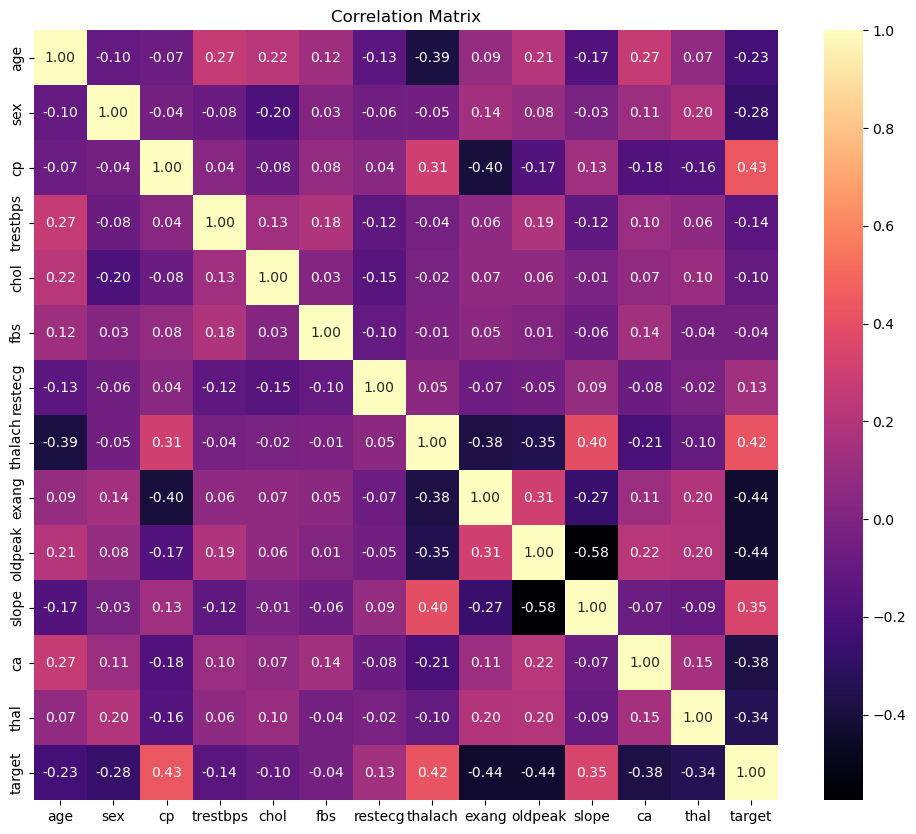

In [13]:
#plot heatmap of the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
plt.title("Age Distribution")
sns.distplot(df["age"])

C:\Users\Shoban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

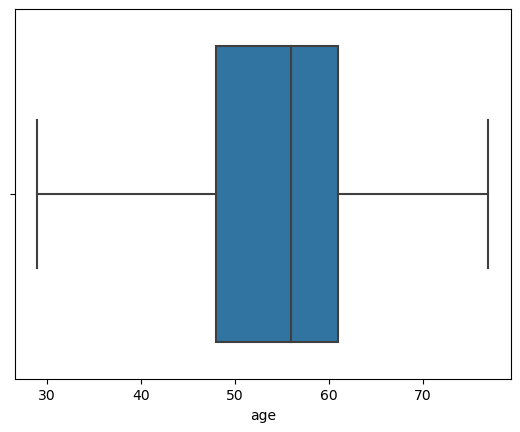

In [15]:
sns.boxplot(df["age"])

C:\Users\Shoban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Ages_of_persons_present_disease'}, ylabel='Density'>

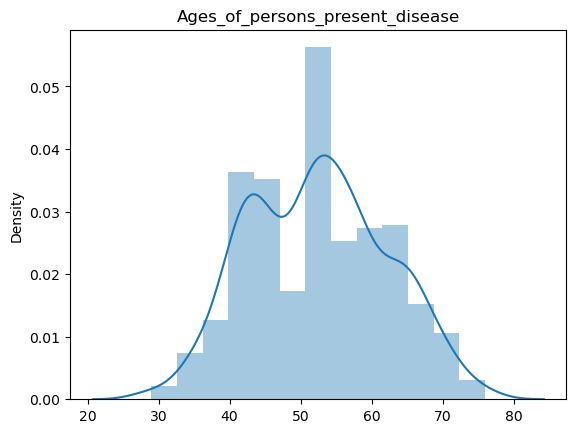

In [16]:
ages_of_persons_present_disease=df[df["target"]==1]["age"]
plt.title("Ages_of_persons_present_disease")
sns.distplot(x=ages_of_persons_present_disease)

<AxesSubplot:xlabel='count', ylabel='sex'>

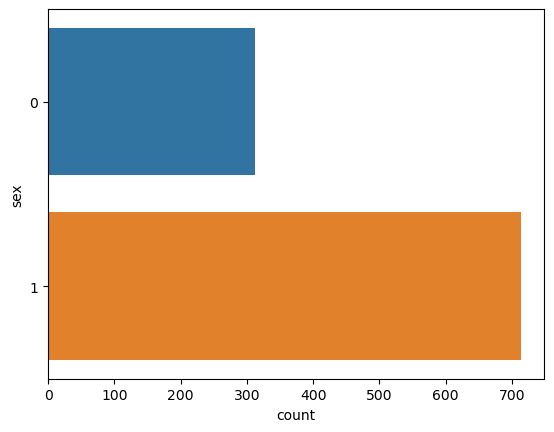

In [17]:
sns.countplot(data=df , y="sex")

Text(0.5, 0, 'Patient ')

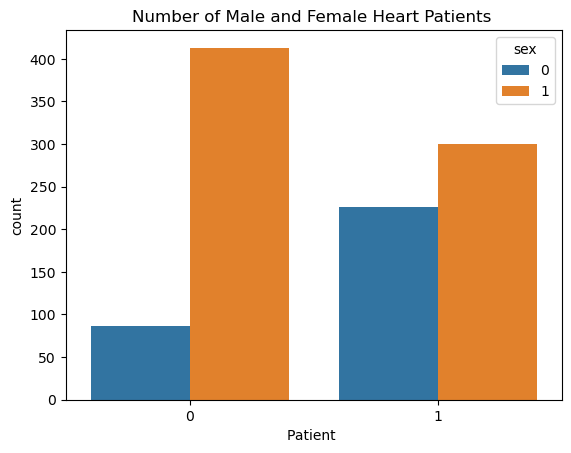

In [18]:
sns.countplot(data=df , x="target" , hue="sex" )
plt.title("Number of Male and Female Heart Patients ")
plt.xlabel("Patient ")

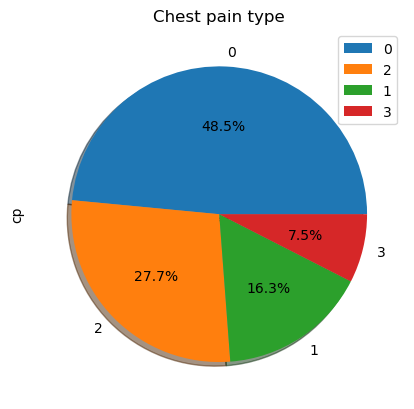

In [19]:
plt.title("Chest pain type")
df["cp"].value_counts().plot(kind="pie" , shadow=True , autopct='%1.1f%%')
plt.legend()

C:\Users\Shoban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'chest_pain_type_present_disease'}, ylabel='Density'>

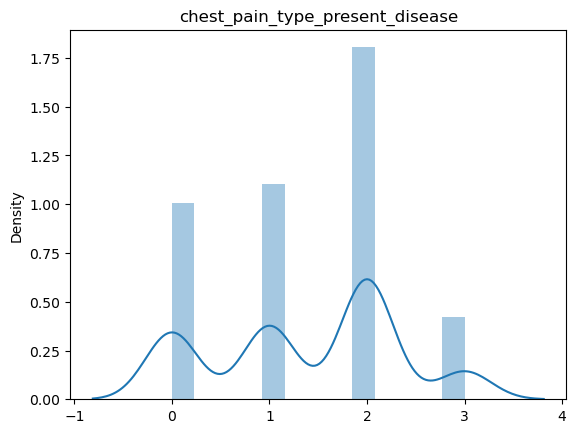

In [20]:
chest_pain_type_present_disease=df[df["target"]==1]["cp"]
plt.title("chest_pain_type_present_disease")
sns.distplot(x=chest_pain_type_present_disease)

C:\Users\Shoban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'The_persons_resting_blood_pressure_present_disease'}, ylabel='Density'>

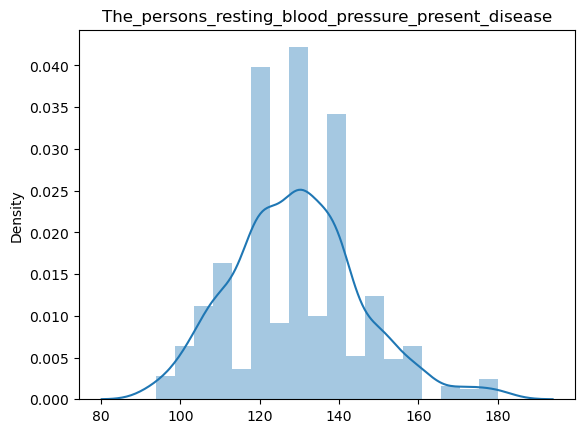

In [21]:
# plt.title("The person's resting blood pressure ")
# sns.distplot(df["trestbps"])

The_persons_resting_blood_pressure_present_disease=df[df["target"]==1]["trestbps"]
plt.title("The_persons_resting_blood_pressure_present_disease")
sns.distplot(x=The_persons_resting_blood_pressure_present_disease)

<AxesSubplot:xlabel='chol'>

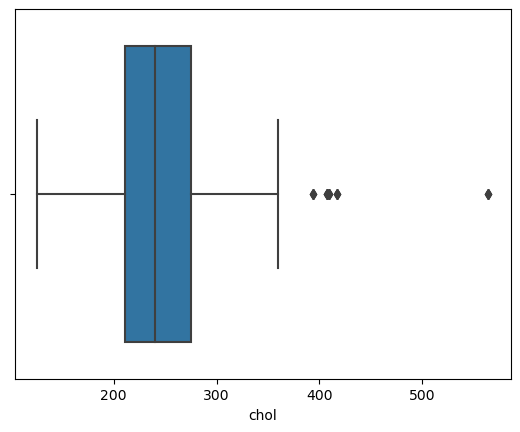

In [22]:
sns.boxplot(x="chol" , data = df)

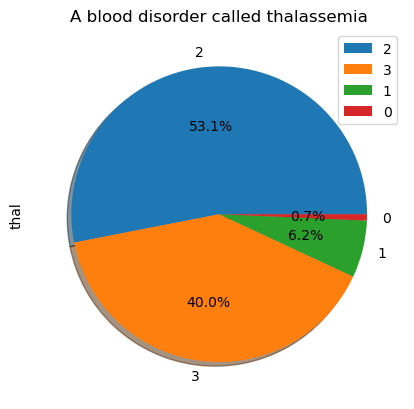

In [23]:
plt.title("A blood disorder called thalassemia")
df["thal"].value_counts().plot(kind="pie" , shadow=True , autopct='%1.1f%%')
plt.legend()

C:\Users\Shoban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Cholesterol_level_pressure_present_disease'}, ylabel='Density'>

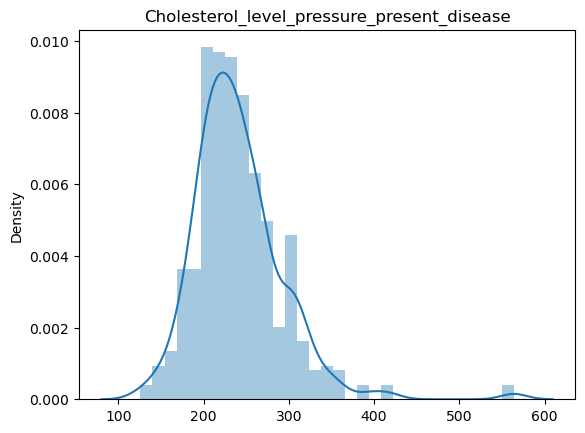

In [24]:
Cholesterol_level_pressure_present_disease=df[df["target"]==1]["chol"]
plt.title("Cholesterol_level_pressure_present_disease")
sns.distplot(x=Cholesterol_level_pressure_present_disease)

Text(0.5, 0, 'Patient ')

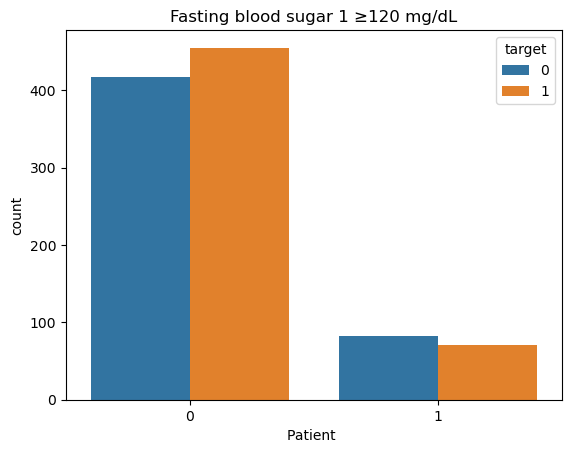

In [25]:
# Fasting blood sugar	1≥120 mg/dL
# df["fbs"]
sns.countplot(data=df , x="fbs" , hue="target")
plt.title("Fasting blood sugar 1 ≥120 mg/dL")
plt.xlabel("Patient ")

Text(0.5, 0, '')

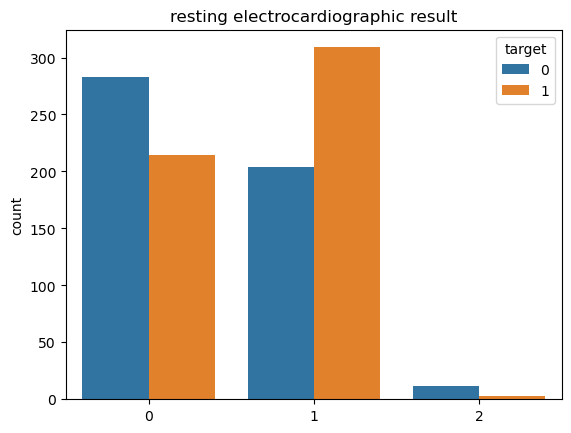

In [26]:
# resting electrocardiographic result
# df["restecg"]
sns.countplot(data=df , x="restecg" , hue="target")
plt.title("resting electrocardiographic result")
plt.xlabel("")

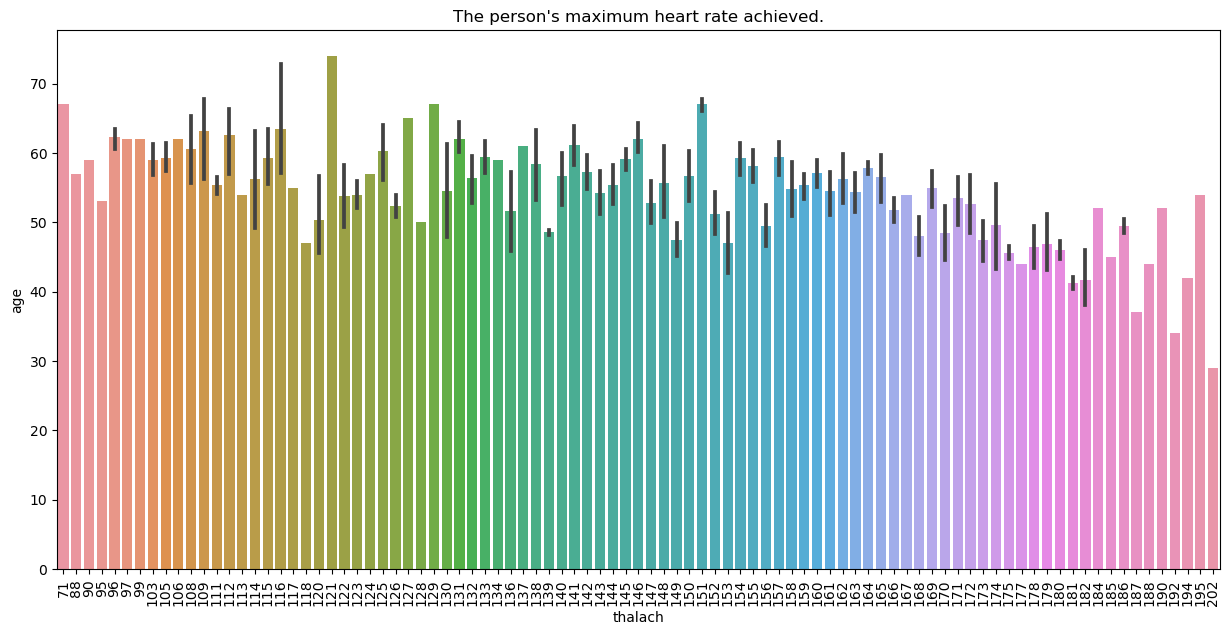

In [27]:
plt.figure(figsize=(15,7))
sns.barplot(x="thalach" , y="age" , data=df)
plt.title("The person's maximum heart rate achieved.")
plt.xticks(rotation="vertical")
plt.show()

Text(0.5, 0, 'Patient ')

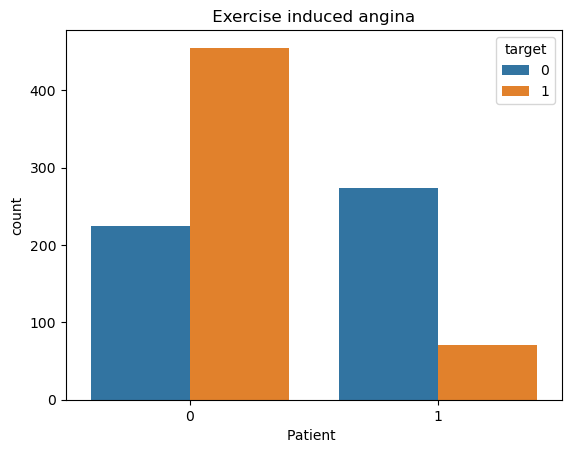

In [28]:
sns.countplot(data=df , x="exang" , hue="target" )
plt.title(" Exercise induced angina ")
plt.xlabel("Patient ")

Text(0.5, 1.0, 'ST depression induced by exercise relative to rest ')

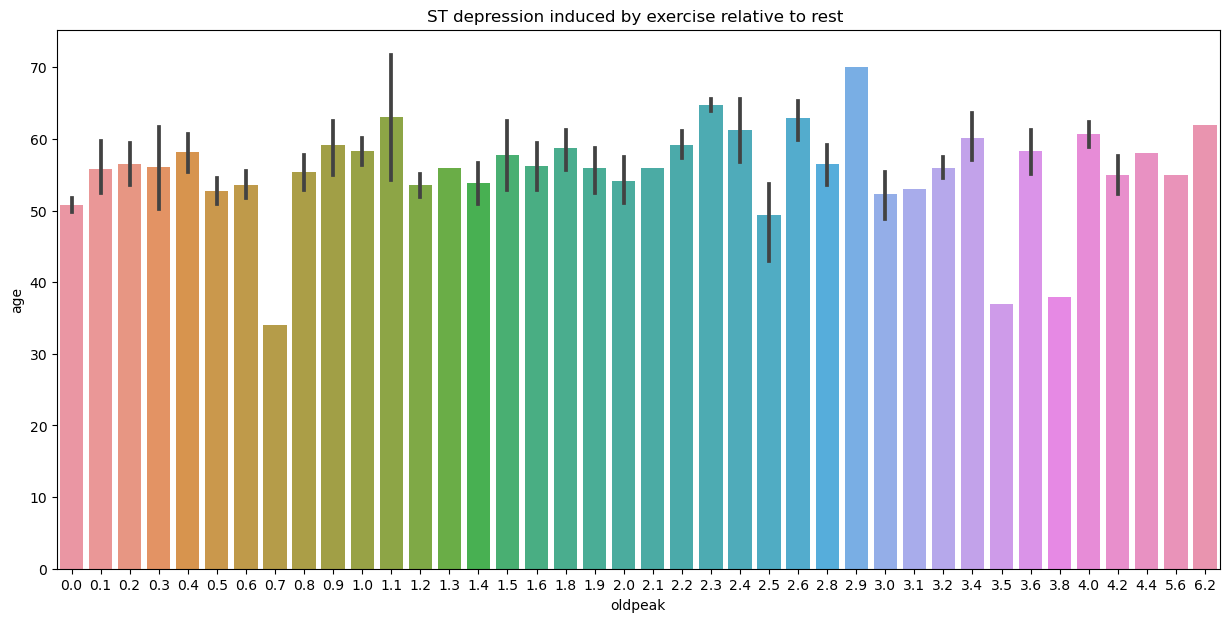

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(x="oldpeak" , y="age" , data=df)
plt.title("ST depression induced by exercise relative to rest ")

Text(0.5, 1.0, 'Gender v/s Thalassemia\n')

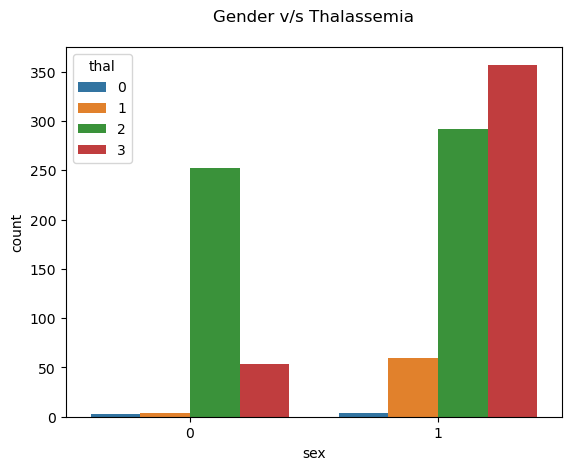

In [30]:
sns.countplot(data= df, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')


Text(0.5, 1.0, 'Slope v/s Target\n')

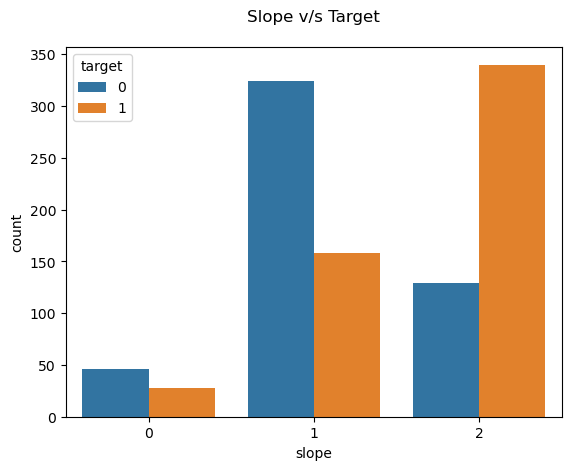

In [31]:
sns.countplot(data= df, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

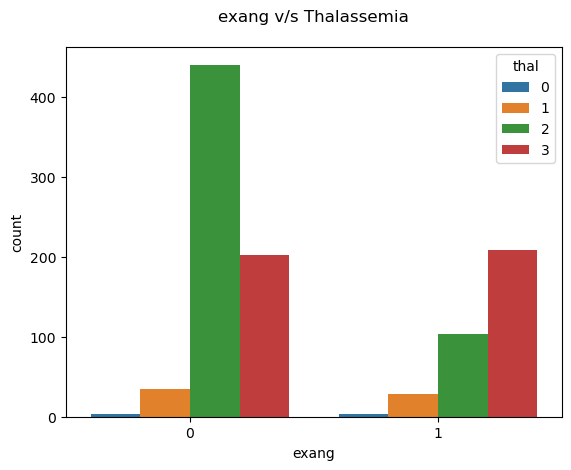

In [32]:
sns.countplot(data= df, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

C:\Users\Shoban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

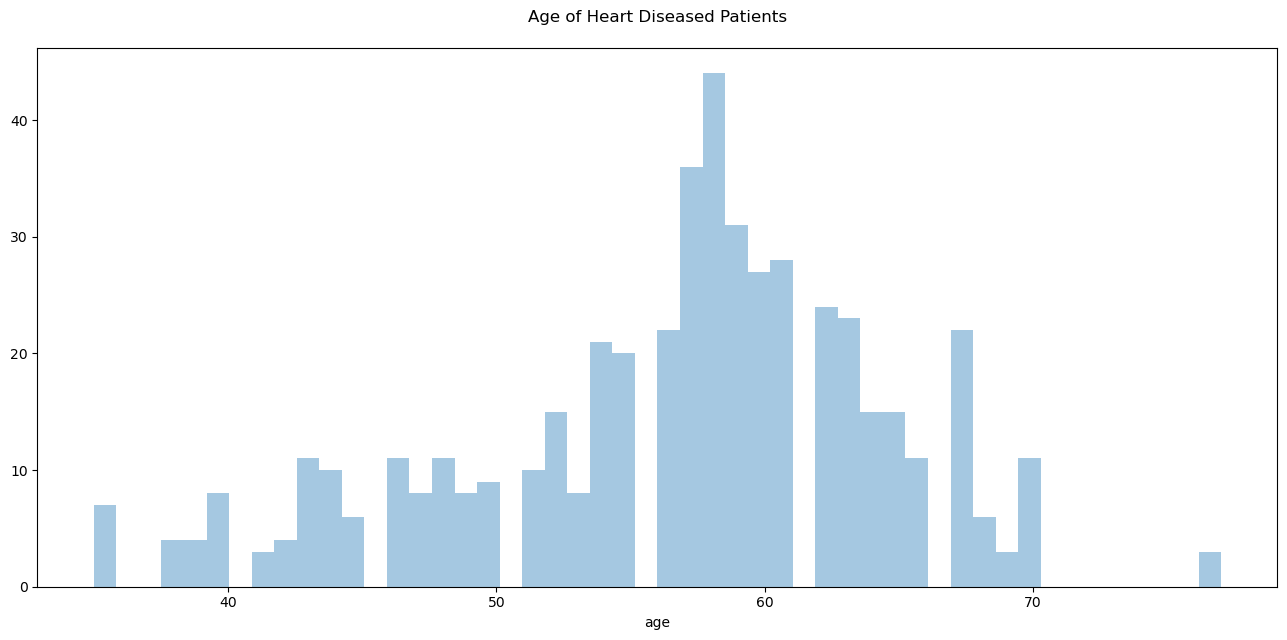

In [33]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

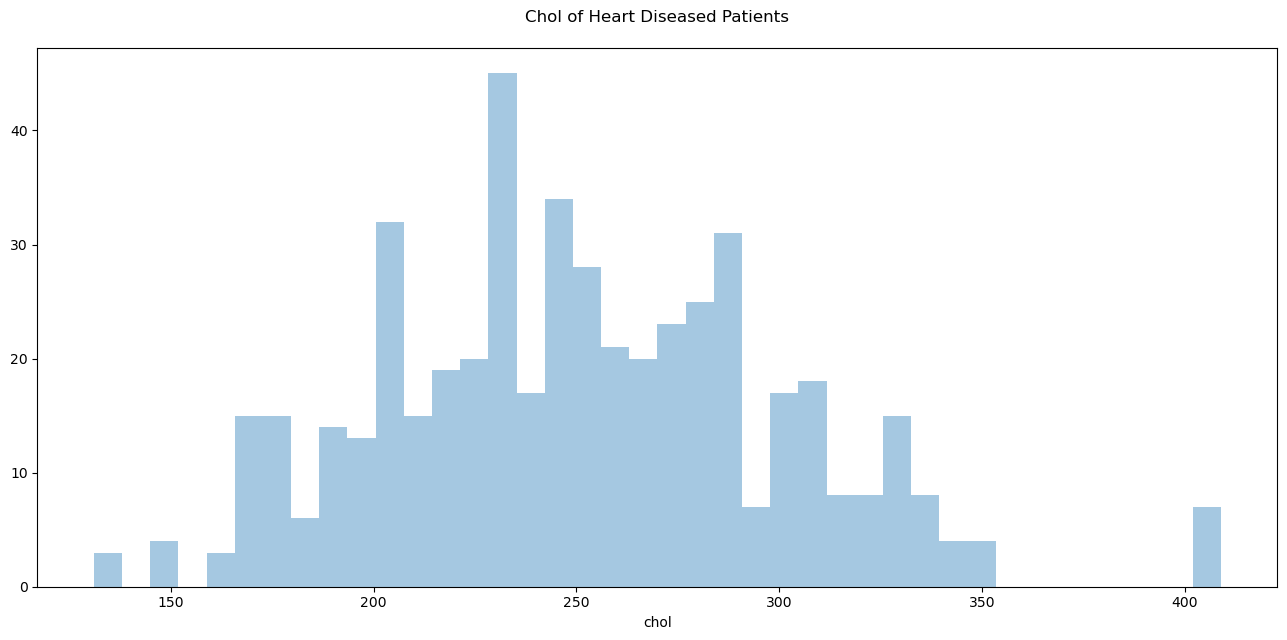

In [34]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

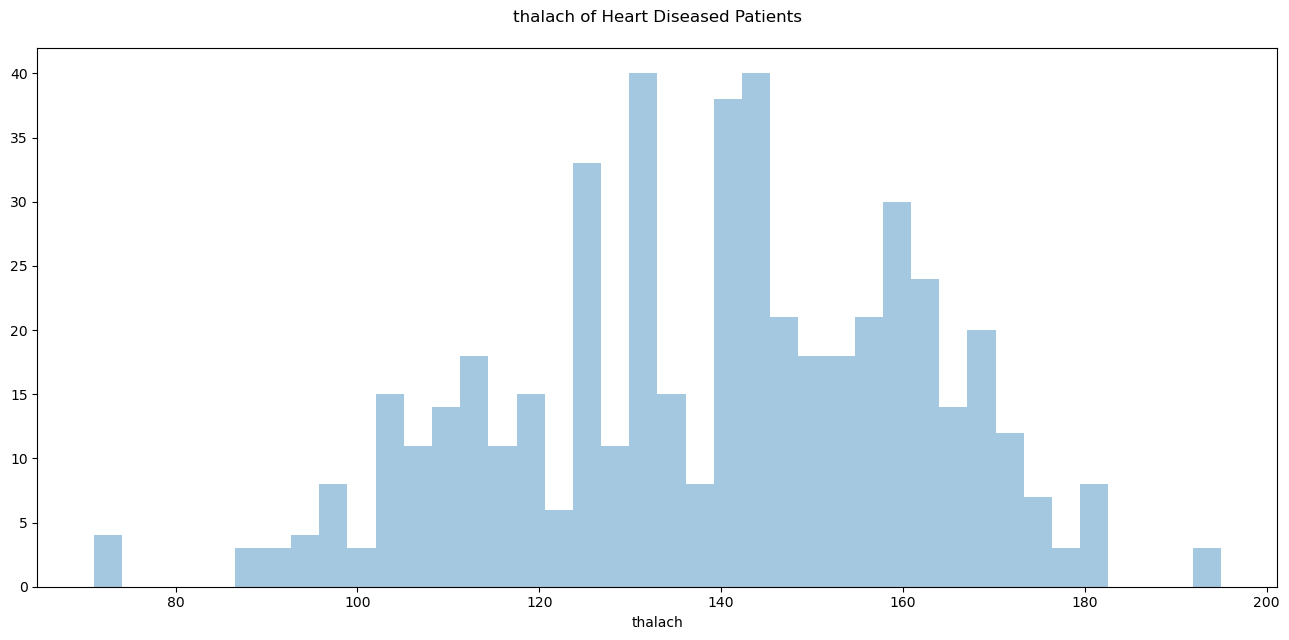

In [35]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

<AxesSubplot:xlabel='target', ylabel='age'>

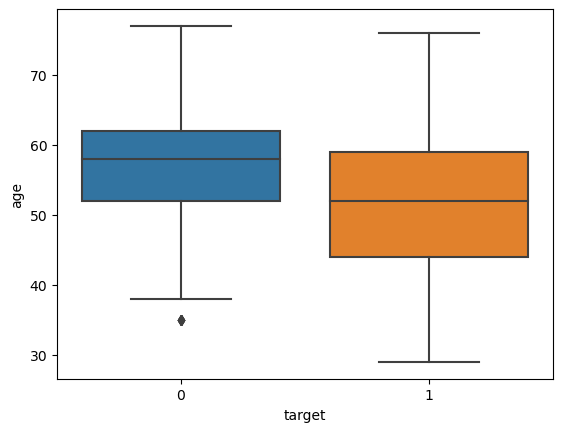

In [36]:
sns.boxplot(data=df,x='target',y='age')

<AxesSubplot:xlabel='ca', ylabel='age'>

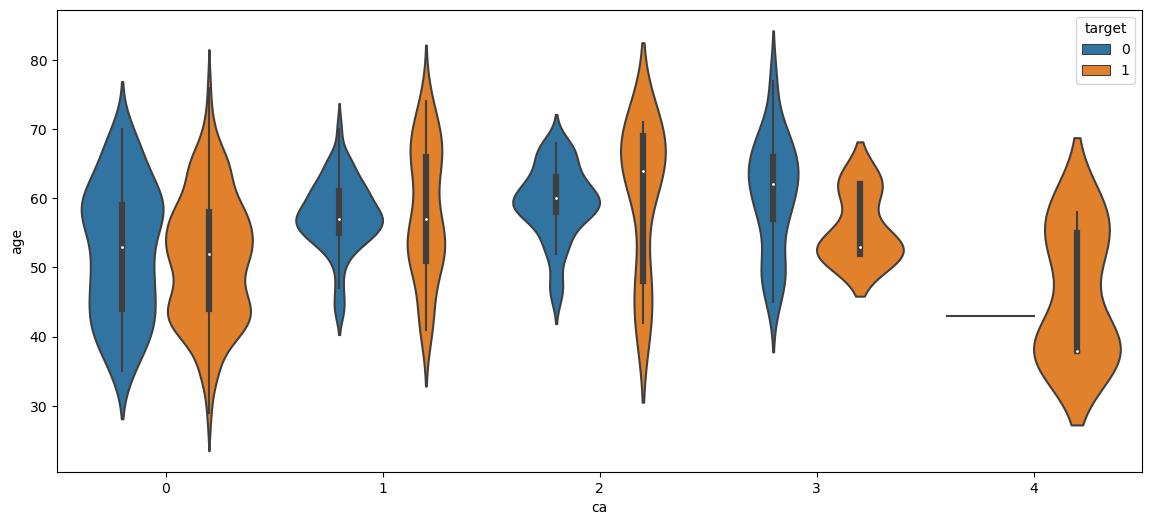

In [37]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df,x='ca',y='age',hue='target')

<AxesSubplot:xlabel='cp', ylabel='thalach'>

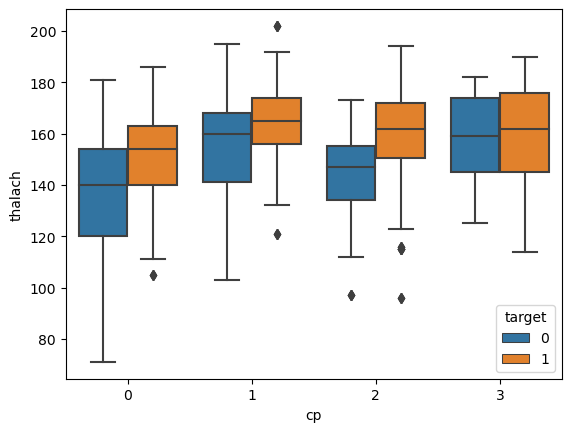

In [38]:
sns.boxplot(data=df,x='cp',y='thalach',hue='target')

<AxesSubplot:xlabel='fbs', ylabel='trestbps'>

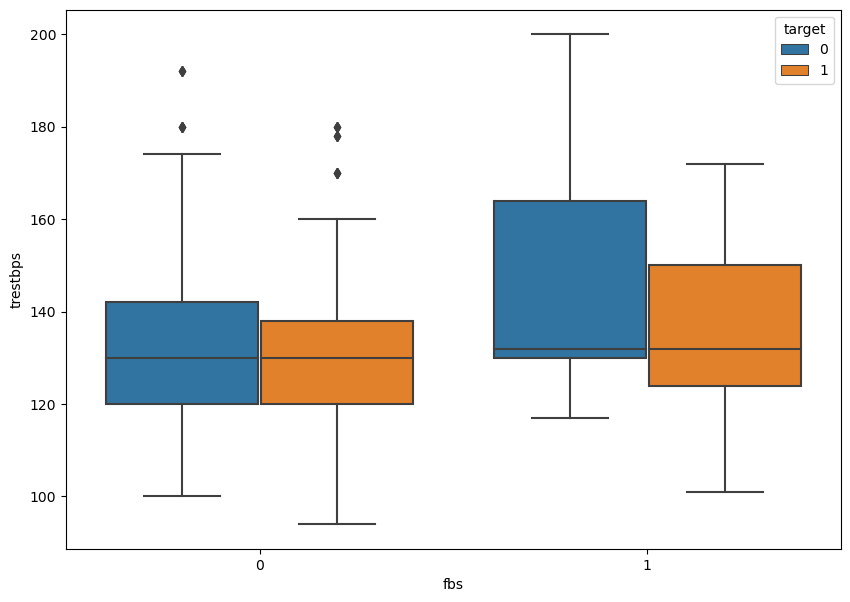

In [39]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='fbs',y='trestbps',hue='target')

<AxesSubplot:xlabel='exang', ylabel='oldpeak'>

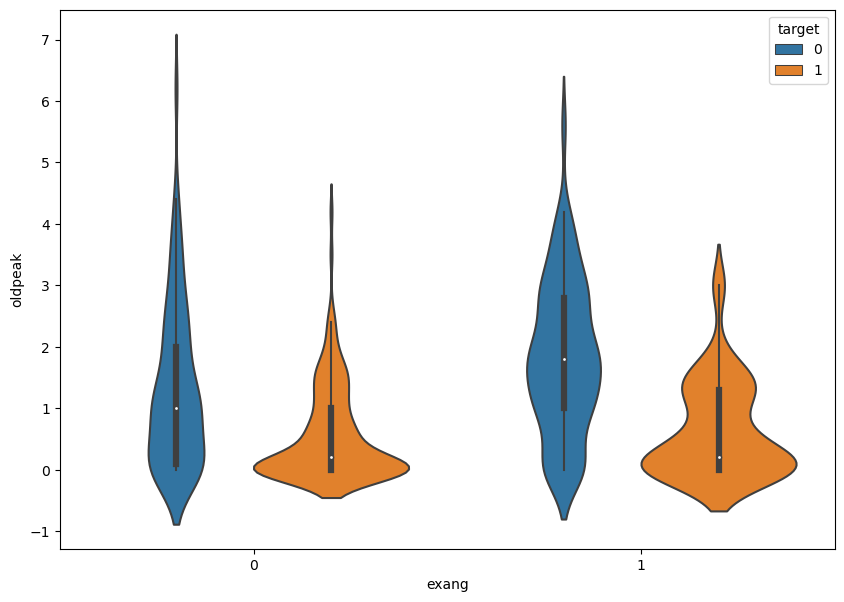

In [40]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df,x='exang',y='oldpeak',hue='target')

<AxesSubplot:xlabel='slope', ylabel='thalach'>

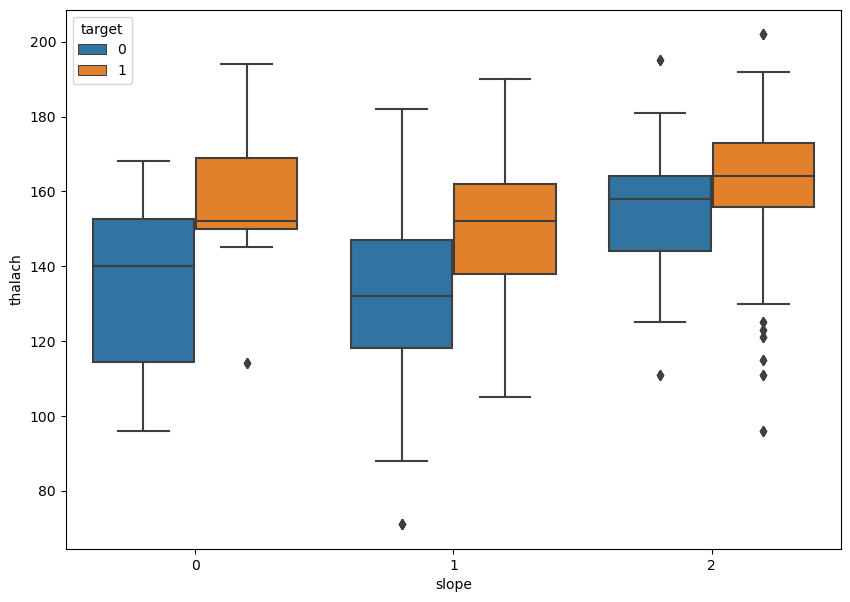

In [41]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='slope',y='thalach',hue='target')

<AxesSubplot:title={'center':'Age vs Cholesterol'}, xlabel='age', ylabel='sex'>

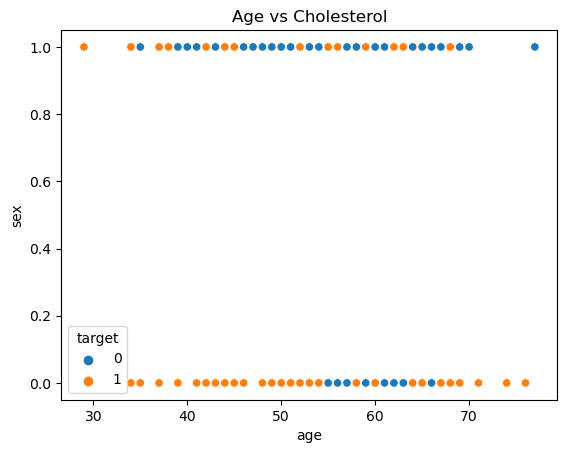

In [42]:
plt.title("Age vs Cholesterol")
sns.scatterplot(x = "age", y = "sex", hue = "target" , data=df)

<AxesSubplot:title={'center':'Age vs Cholesterol'}, xlabel='age', ylabel='chol'>

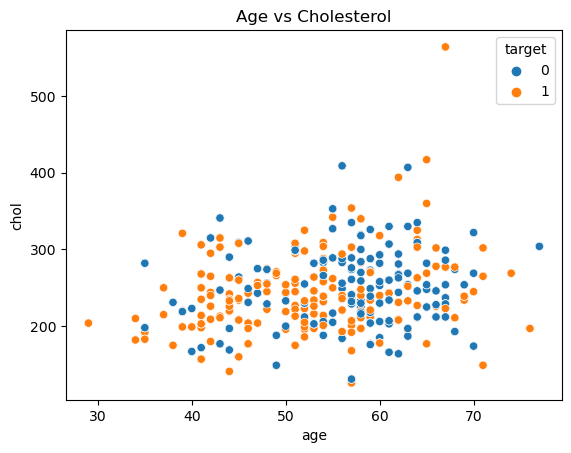

In [43]:
plt.title("Age vs Cholesterol")
sns.scatterplot(x = "age", y = "chol", hue = "target" , data=df)

<AxesSubplot:xlabel='age', ylabel='sex'>

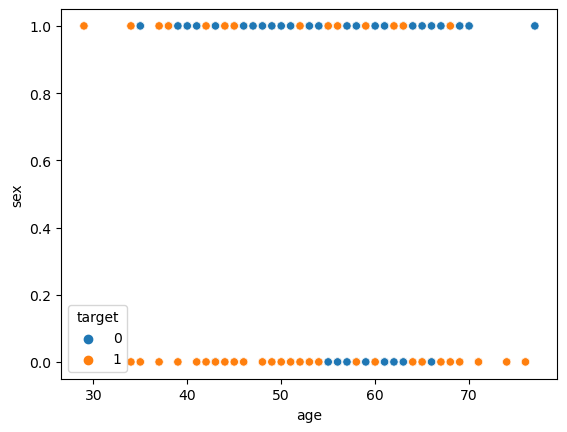

In [44]:
sns.scatterplot(x = "age", y = "sex", hue = "target" , data=df)

# Using Logistic Regression with Accuracy : 80%

In [45]:
df
#select Features
x = df.drop(columns='target', axis=1)
y = df['target']

#distribute the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

#create object of the model
model = LogisticRegression()


# train the model
model.fit(x_train, y_train)

#prediction
y_pred = model.predict(x_test)


#classfication report and confusion matrix
from sklearn.metrics import confusion_matrix , classification_report
  
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
class_report=classification_report(y_test, y_pred )
print("classification_report" ,class_report)


from sklearn.metrics import accuracy_score
  
print ("Accuracy : ",accuracy_score(y_test, y_pred))


Confusion Matrix : 
 [[72 28]
 [12 93]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.77      0.89      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

Accuracy :  0.8048780487804879


C:\Users\Shoban\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
#creating Input system from the user
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
# print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

The Person does not have a Heart Disease


C:\Users\Shoban\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


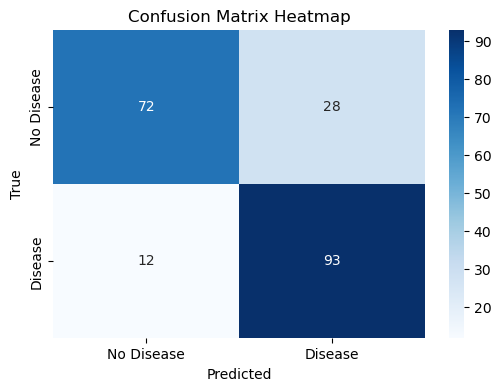

In [47]:
#plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"],yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Using KNN Classifier Accuracy :  0.73%

In [48]:
#read csv
df=pd.read_csv("heart.csv")

#Features select
x = df.drop(columns='target', axis=1)
y = df['target']


#split data into trainig and testing data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.3 ,random_state= 3)


#imoort KNN model
from sklearn.neighbors import KNeighborsClassifier


#create object of the model
knn = KNeighborsClassifier(n_neighbors=12)


#train the model
knn.fit(x_train, y_train)


#prediction
y_pred = knn.predict(x_test)


#classification report and confusion_matrix
from sklearn.metrics import confusion_matrix , classification_report
  
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
class_report=classification_report(y_test, y_pred )
print("classification_report" ,class_report)


from sklearn.metrics import accuracy_score
  
print ("Accuracy : ",accuracy_score(y_test, y_pred))




Confusion Matrix : 
 [[122  28]
 [ 53 105]]
classification_report               precision    recall  f1-score   support

           0       0.70      0.81      0.75       150
           1       0.79      0.66      0.72       158

    accuracy                           0.74       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.74      0.74      0.74       308

Accuracy :  0.737012987012987


C:\Users\Shoban\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


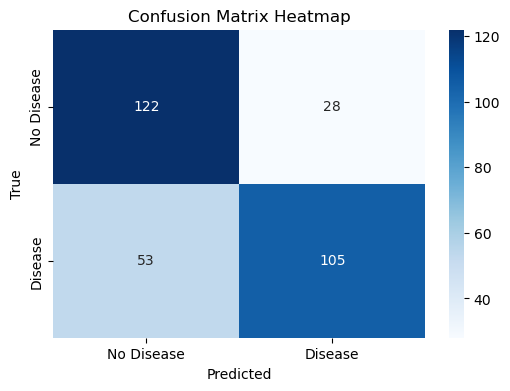

In [49]:
#plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"],yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Decision Tree Classifier with Accuracy: 1.0%

In [50]:
#import model
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

#select features
X = df.iloc[:,0:13] 
y = df.iloc[:,13]

#split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=89) 



#create object of the model
dtree = DecisionTreeClassifier()

#train the model
dtree = dtree.fit(X_train,y_train)

#prediction
y_pred = dtree.predict(X_test)

#accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train contains your training data
# Create an imputer that replaces NaNs with the mean
imputer = SimpleImputer(strategy='mean')

# Create a DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Create a pipeline that first imputes missing values and then fits the classifier
pipeline = Pipeline([
    ('imputer', imputer),
    ('classifier', classifier)
])

# Fit the pipeline on your data
pipeline.fit(X_train, y_train)







Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', DecisionTreeClassifier())])

In [52]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[152   0]
 [  0 156]]


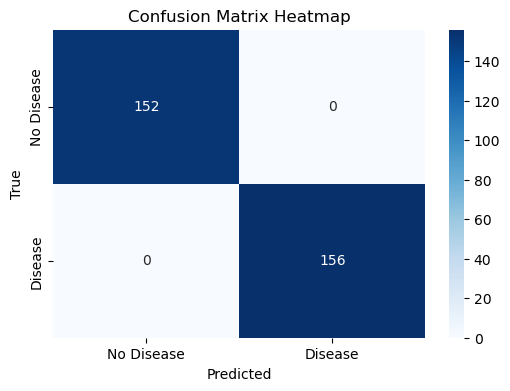

In [53]:
#plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# using SVM with Accuracy :  0.73%

In [54]:
#import model
from sklearn.svm import SVC

#read csv
df=pd.read_csv("heart.csv")

#feature selection
x = df.drop(columns='target', axis=1)
y = df['target']


#split data into training and testing data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.3 ,random_state= 3)


#create object of the model 
svm = SVC(kernel="rbf", gamma=6, C=6)
# Trained the model
svm.fit(x_train,y_train)


#prediction 
y_pred = knn.predict(x_test)


#classification report and confusion matrix
from sklearn.metrics import confusion_matrix , classification_report
  
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
class_report=classification_report(y_test, y_pred )
print("classification_report" ,class_report)


# accuracy score
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ",accuracy_score(y_test, y_pred))




Confusion Matrix : 
 [[122  28]
 [ 53 105]]
classification_report               precision    recall  f1-score   support

           0       0.70      0.81      0.75       150
           1       0.79      0.66      0.72       158

    accuracy                           0.74       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.74      0.74      0.74       308

Accuracy :  0.737012987012987


C:\Users\Shoban\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# using RandomForestClassifier with ACCURACY:  1.0%

In [56]:
from sklearn.ensemble import RandomForestClassifier

#split data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y ,random_state=3)

#create object for the model
clf = RandomForestClassifier(n_estimators = 10)  


#train the model
clf.fit(x_train, y_train)

#prediction
y_pred = clf.predict(x_test)

from sklearn import metrics  

#classfication report 
print("ACCURACY OF THE MODEL: ",  metrics.accuracy_score(y_test, y_pred))
class_report=classification_report(y_test, y_pred )
print("classification_report" ,class_report)


ACCURACY OF THE MODEL:  1.0
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



# Save the model

In [57]:
import pickle

In [58]:
filename="Save models/heart2.sav"

In [59]:
pickle.dump(dtree , open(filename , "wb"))

In [60]:
loadmodel=pickle.load(open(filename,'rb'))

In [61]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0


In [120]:
#creating prediction system 

input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
121
# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loadmodel.predict(input_data_reshaped)
# print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

The Person does not have a Heart Disease


C:\Users\Shoban\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
